# Descrição do Projeto

Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso permitirá que você identifique potenciais grandes vencedores e planeje campanhas publicitárias.
Na sua frente estão dados que remontam a 2016. Vamos imaginar que estamos em dezembro de 2016 e você está planejando uma campanha para 2017.
(O importante é ter experiência trabalhando com dados. Realmente não importa se você está prevendo as vendas de 2017 com base nos dados de 2016 ou as vendas de 2027 com base nos dados de 2026.)
O conjunto de dados contém a abreviatura ESRB. O Entertainment Software Rating Board avalia o conteúdo de um jogo e atribui uma classificação etária, como Adolescente ou Maduro.

/

You work for the online store Ice, which sells video games worldwide. User and expert reviews, genres, platforms (for example, Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game is successful or not. This will allow you to identify potential big winners and plan advertising campaigns. In front of you are data dating back to 2016. Let's imagine it's December 2016, and you're planning a campaign for 2017. (The important thing is to have experience working with data. It really doesn't matter whether you're predicting 2017 sales based on 2016 data or 2027 sales based on 2026 data.) The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates the content of a game and assigns an age rating, such as Teen or Mature.

## inicializacao

In [1]:
# lendo bibliotecas / reading libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats as st

from scipy.stats import t

from scipy.stats import ttest_ind

from scipy.stats import levene


In [2]:
# lendo arquivo / reading file

try:
    esrb = pd.read_csv("/datasets/games.csv")

except FileNotFoundError:
    esrb = pd.read_csv("games.csv")

## carregando dados

In [3]:
# visualizando informacoes / having a 1st look at its content

esrb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
esrb.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Identificamos 16715 entradas, os nomes de colunas precisam ser melhorados e padronizados.

Algumas colunas contem valores ausentes, Name, Year_of_Release, Genre, Critic_score, User_Score, Rating

Alguns tipos de dados precisam também ser modificados.

//


We have identified 16,715 entries; the column names need to be improved and standardized.

Some columns contain missing values: Name, Year_of_Release, Genre, Critic_score, User_Score, Rating.

Some data types also need to be modified.


In [5]:
esrb.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


vamos categorizar os scores baseado nas vendas e salvar em uma nova coluna

/

Let's categorize the scores based on sales and save them in a new column



## modificando tipo de dados

In [6]:
# padronizando nomes de colunas / standarizing columns

esrb.columns = esrb.columns.str.lower()

In [7]:
esrb.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
# modificando tipo de dados em year_of_release para inteiro / modifing data

esrb['year_of_release'] = esrb['year_of_release'].astype(float).astype(pd.Int32Dtype())

## lindando com valores ausentes

### name

In [9]:
# visualizando linhas com nomes ausentes / looking at missing lines

esrb.loc[esrb['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
# excluindo linhas na coluna 'names' ausentes / deleting missing names

esrb = esrb.dropna(subset=['name'])

apenas dois nomes ausentes de 16714, portando irei deletar esses dados.

/

only 2 missing names out of 16714, therefore I will delete those.

### year of release

In [11]:
# visualizando valores unicos em 'year_of_release' / looking at unique values in 'year_of_release'

esrb['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int32

In [12]:
# visualizando linhas que tem valores ausentes em 'year_of_release'

esrb.loc[esrb['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
# extraindo ano contido no nome do jogo e salvando em nova coluna 'year'

esrb['year'] = esrb['name'].str.extract(r'(\d{4})', expand=False)

In [14]:
# visualizando valores que foram para a coluna 'year'

esrb['year'].sort_values().unique()

array(['0079', '0081', '0122', '1000', '1001', '1080', '1450', '1500',
       '1692', '1701', '1800', '1886', '1942', '1943', '1945', '1946',
       '1969', '1996', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2020', '2025', '2033',
       '2048', '2049', '2070', '2089', '2100', '2142', '2205', '2500',
       '2600', '3000', nan], dtype=object)

In [15]:
# transformando coluna 'year' para numerica

esrb['year'] = pd.to_numeric(esrb['year'], errors='coerce')

In [16]:
# aplicando filtro que apenas valores entre 1996 e 2016 preencherao valores nulos em 'year_of_release'

filter = (esrb['year'] >= 1996) & (esrb['year'] <= 2016)
esrb['year_of_release'].fillna(esrb['year'].where(filter), inplace=True)

analisando os 4 numeros que foram retirados dos nomes dos jogos, podemos dizer que entre 1996 e 2016, apenas, os jogos tiveram seus anos de lançamento descritos em seus titulos, por isso o filtro utilizado. Não existiam videogames em 1969 que é a data retirada do nome do jogo anterior a 1996, e estamos em 2017, portanto, qualquer data acima disso, não representa a data em que o jogo foi lançado.

/

Analyzing the four numbers that were removed from the game names, we can infer that between 1996 and 2016, games had their release years mentioned in their titles, hence the applied filter. There were no video games in 1969, which is the date extracted from the game name prior to 1996. Furthermore, as of 2017, any date beyond that doesn't represent the game's release date.

In [17]:
# deletando coluna 'year' nao necessaria / deleting unnecessary column

esrb.drop(columns=['year'], inplace=True) 

In [18]:
esrb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16461 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int32(1), float64(5), object(5)
memory usage: 1.5+ MB


In [19]:
esrb.isna().sum()

name                  0
platform              0
year_of_release     252
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [20]:
# descrevendo porcentagem de dados com 'year_of_release' ausentes

(esrb['year_of_release'].isna().sum()/len(esrb['year_of_release']))*100


1.5078082929456111

In [21]:
# deletando linhas com valores ausentes em 'year_of_release'

esrb = esrb.dropna(subset=['year_of_release'])

In [22]:
esrb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  Int32  
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     7995 non-null   float64
 9   user_score       9851 non-null   object 
 10  rating           9779 non-null   object 
dtypes: Int32(1), float64(5), object(5)
memory usage: 1.5+ MB


levando em consideração que apenas 1.5% dos dados tinham seus 'year_of_release' ausentes, decidi por deletar esses dados para eliminar o ruido na hora da análise.

/ 

Considering that only 1.5% of the data had missing 'year_of_release' values, I've decided to delete these entries to eliminate noise during the analysis

In [23]:
esrb = esrb.drop(esrb[(esrb['platform'] == 'DS') & (esrb['year_of_release'] == 1985)].index)

os dados acimas foram deletados, plataforma DS foi lançada em 2004, porém aqui continha dados de 1985.

/

The above data has been deleted. The DS platform was launched in 2004, but here it contained data from 1985

### rating

In [24]:
# visualizando valores unicos em 'rating'

esrb['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [25]:
# visualizando dados com valores nulos na coluna 'rating'

esrb.loc[esrb['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [26]:
# preenchendo valores nulos em 'rating' por ND ( not defined )

esrb['rating'].fillna('ND', inplace=True)

preenchi valores nulos em 'rating' por ND ou 'not defined'

/ 

I filled in the null values in 'rating' with 'ND' or 'not defined'

### critic score

In [27]:
# visualizando dados unicos em 'critic_score'

esrb['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [28]:
# visualizando dados com valores nulos em 'critic_score'

esrb.loc[esrb['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,ND
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,ND
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,ND
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,ND
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,ND
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,ND
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,ND
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,ND
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,ND


In [29]:
esrb['critic_score'].describe()

count    7995.000000
mean       69.003127
std        13.925222
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [30]:
# preenchendo valores nulos em 'critic_score' pela media 

esrb['critic_score'].fillna(esrb['critic_score'].mean(), inplace=True)

observando que valores de media e mediana são parecidos, isso indica uma distribuicão simetrica, portanto, decidi por substituir os valores ausentes em 'critic_score' pela média.

/

Observing that mean and median values are similar, indicating a symmetric distribution, I have decided to replace the missing values in 'critic_score' with the mean

In [31]:
# verificando se ainda existem valores ausentes

esrb['critic_score'].isna().sum()

0

### user score

In [32]:
# observando valores unicos em 'user_score'

esrb['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [33]:
count_tbd = np.count_nonzero(esrb == 'tbd')

count_tbd 

2378

In [34]:
esrb_no_tbd = esrb[esrb['user_score'] != 'tbd']

In [35]:
esrb_no_tbd.dropna(subset=['user_score'], inplace=True)

/tmp/ipykernel_59/1862519019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esrb_no_tbd.dropna(subset=['user_score'], inplace=True)


In [36]:
esrb_no_tbd['user_score'] = esrb_no_tbd['user_score'].astype(float)

/tmp/ipykernel_59/440811435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esrb_no_tbd['user_score'] = esrb_no_tbd['user_score'].astype(float)


In [37]:
esrb_no_tbd['user_score'].describe()

count    7473.000000
mean        7.127793
std         1.499196
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [38]:
# trocando valores string tbd por media

esrb['user_score'].replace('tbd', esrb_no_tbd['user_score'].mean(), inplace=True)

In [39]:
# transformando dados em 'float' 

esrb['user_score'] = esrb['user_score'].astype(float)

In [40]:
# achando valores de media e mediana em 'user_score'

esrb['user_score'].describe()

count    9851.000000
mean        7.127793
std         1.305746
min         0.000000
25%         6.800000
50%         7.127793
75%         8.000000
max         9.700000
Name: user_score, dtype: float64

In [41]:
# usando media de 'user_score' para preencher valores ausentes em 'user_score'

esrb['user_score'].fillna(esrb['user_score'].mean(), inplace=True)

In [42]:
# verificando se ainda existem valores ausentes em 'user_score'

esrb['user_score'].isna().sum()

0

novamente, a media e mediana entre os 'user_score' foram similares, o que indica uma distribuição simetrica dos dados, então, escolhi sua média para substituir os valores nulos em 'user_score'

/

Once again, the mean and median values for 'user_score' were similar, indicating a symmetric distribution of the data. Therefore, I chose the mean to replace the null values in 'user_score'

### genre

In [43]:
# visualizando dados com valores nulos em 'genre'

esrb['genre'].isna().sum()

0

In [44]:
esrb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16460 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16460 non-null  object 
 1   platform         16460 non-null  object 
 2   year_of_release  16460 non-null  Int32  
 3   genre            16460 non-null  object 
 4   na_sales         16460 non-null  float64
 5   eu_sales         16460 non-null  float64
 6   jp_sales         16460 non-null  float64
 7   other_sales      16460 non-null  float64
 8   critic_score     16460 non-null  float64
 9   user_score       16460 non-null  float64
 10  rating           16460 non-null  object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.5+ MB


## enriquecendo dados

### total sales

In [45]:
# criando coluna com valor total de vendas

esrb['total_sales'] = esrb['na_sales'] + esrb['eu_sales'] + esrb['jp_sales'] + esrb['other_sales']

In [46]:
esrb.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.003127,7.127793,ND,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,69.003127,7.127793,ND,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,69.003127,7.127793,ND,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.000000,8.500000,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.000000,6.600000,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.000000,8.400000,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,69.003127,7.127793,ND,28.31


nova coluna criada com valor total de vendas de cada jogo, considerando as vendas na aerica do norte, europa, japão e outras regiões do mundo

/

A new column has been created with the total sales value for each game, considering sales in North America, Europe, Japan, and other regions of the world

### successful rate

In [47]:
# funcao para categorizar avaliacao de sucesso baseado em numero de vendas

def success_rate(total_sales):
    if total_sales <= 5:
        return 'unsuccessful'    
    if total_sales <= 10:
        return 'satisfying'
    if total_sales <= 25:
        return 'successful'
    if total_sales >= 26:
        return 'outstanding'
    
print(success_rate(5))
print(success_rate(10))
print(success_rate(25))
print(success_rate(26))

unsuccessful
satisfying
successful
outstanding


In [48]:
# aplicando funcao e criando nova coluna com categoria de sucesso

esrb['success_rate'] = esrb['total_sales'].apply(success_rate)

esrb.head()    

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,success_rate
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54,outstanding
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.003127,7.127793,ND,40.24,outstanding
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52,outstanding
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77,outstanding
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,69.003127,7.127793,ND,31.38,outstanding


categorizando sucesso de vendas dos jogos, baseado na receita total de vendas

/

Categorizing the success of game sales based on the total revenue from sales.

### decades

In [49]:
# visualizando valores unicos em 'year_of_release'

esrb['year_of_release'].sort_values().unique()

<IntegerArray>
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Length: 37, dtype: Int32

In [50]:
# funcao para categorizar decadas

def decade(year_of_release):
    if year_of_release <= 1990:
        return '80s'    
    if year_of_release <= 2000:
        return '90s'
    if year_of_release <= 2010:
        return '00s'
    if year_of_release >= 2011:
        return '10s'
    
print(decade(1990))
print(decade(2000))
print(decade(2010))
print(decade(2011))

80s
90s
00s
10s


In [51]:
# aplicando função para categorizar o lançamento dos jogos por decadas

esrb['decades'] = esrb['year_of_release'].apply(decade)

In [52]:
esrb.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,success_rate,decades
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54,outstanding,00s
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.003127,7.127793,ND,40.24,outstanding,80s
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52,outstanding,00s
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77,outstanding,00s
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,69.003127,7.127793,ND,31.38,outstanding,90s


## Analise de dados

### year of release histogram

In [53]:
esrb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16460 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16460 non-null  object 
 1   platform         16460 non-null  object 
 2   year_of_release  16460 non-null  Int32  
 3   genre            16460 non-null  object 
 4   na_sales         16460 non-null  float64
 5   eu_sales         16460 non-null  float64
 6   jp_sales         16460 non-null  float64
 7   other_sales      16460 non-null  float64
 8   critic_score     16460 non-null  float64
 9   user_score       16460 non-null  float64
 10  rating           16460 non-null  object 
 11  total_sales      16460 non-null  float64
 12  success_rate     16460 non-null  object 
 13  decades          16460 non-null  object 
dtypes: Int32(1), float64(7), object(6)
memory usage: 1.8+ MB


In [54]:
esrb['year_of_release'].describe()

count    16460.000000
mean      2006.486938
std          5.871108
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

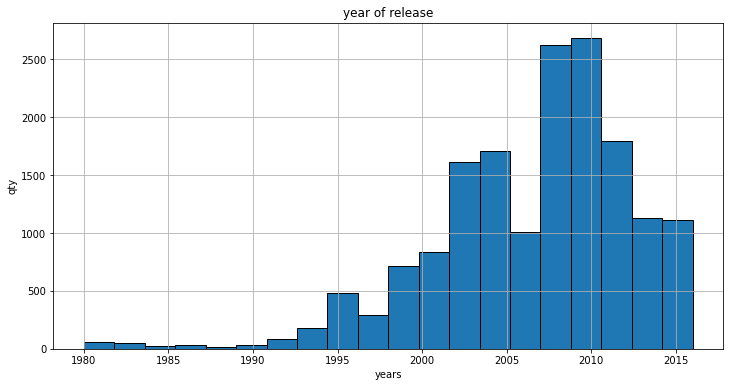

In [55]:
# visualizando anos em que tiveram maior quantidade de lancamento de jogos

esrb['year_of_release'].hist(bins=20, figsize=(12,6), edgecolor='black')
plt.xlabel('years')
plt.ylabel('qty')
plt.title('year of release')
plt.show()

    vemos que entre 2003 e 2010 tivemos a maior quantidade de lançamentos de jogos, sendo que o pico está entre 2007 e 2011
    
    /
    
    We can observe that between 2003 and 2010, there was the highest number of game releases, with the peak occurring between 2007 and 2011.

In [56]:
# descrevendo valores em 'year_of_release'

esrb['year_of_release'].describe()

count    16460.000000
mean      2006.486938
std          5.871108
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

<AxesSubplot:>

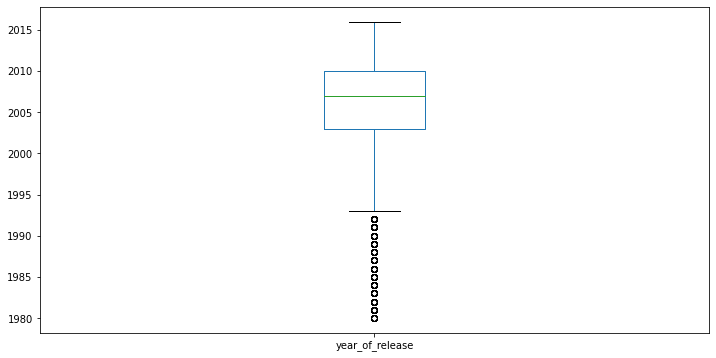

In [57]:
esrb['year_of_release'].plot(figsize=(12,6), kind='box')

    observamos os quartis entre 2003 e 2010, e quantidade considerável de outliers abaixo do limite minimo.
    
    /
    
    We observed the quartiles between 2003 and 2010 and a considerable number of outliers below the minimum limit.

In [58]:
# calculando valor q1 em 'year_of_release'

q1 = np.percentile(esrb['year_of_release'], 25)

q1

2003.0

In [59]:
# calculando valor q3 em 'year_of_release'

q3 = np.percentile(esrb['year_of_release'], 75)

q3

2010.0

In [60]:
# calculando intervalo dos quartis

IQR = q3 - q1

IQR

7.0

In [61]:
# definindo o limite inferior

lower_bound = q1 - 1.5 * IQR

lower_bound

1992.5

In [62]:
# definindo o limite superior

upper_bound = q3 + 1.5 * IQR

upper_bound

2020.5

limites superior e inferior encontrados para fatiar dados sem outliers.

/

The upper and lower limits have been identified to slice the data without outliers.

### platform x total_sales

In [63]:
# criando pivot table soma de vendas por plataforma 

sales_platform = pd.pivot_table(esrb, index = 'platform', values = 'total_sales', aggfunc='sum')

sales_platform = sales_platform.sort_values(by='total_sales', ascending=False)

sales_platform = sales_platform.reset_index()

In [64]:
# criando lista top 5 platforms

top10_platform = sales_platform.nlargest(10, 'total_sales')

top10_platform.head(20)

,platform,total_sales
0,PS2,1247.28
1,X360,961.30
2,PS3,931.34
3,Wii,891.18
4,DS,802.77
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,290.34
9,3DS,257.81


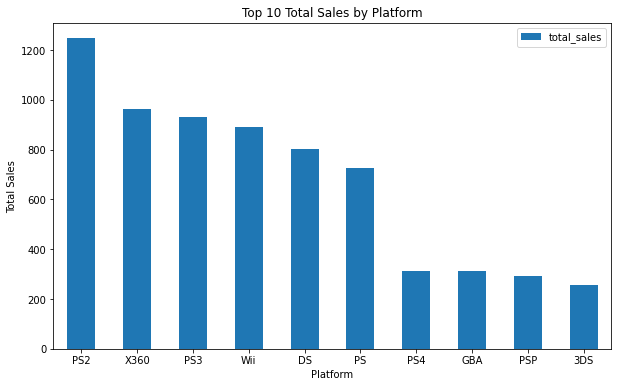

In [65]:
# plotando o top 10 sales de todos os tempos

top10_platform.plot(kind='bar', figsize=(10, 6), stacked=True, x='platform', y='total_sales')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.title('Top 10 Total Sales by Platform')
plt.xticks(rotation=0)
plt.show()

    nesse histograma, vemos as plataformas que venderam mais, ps2 vem em primeiro bem acima dos segundo colocado. Dentre os próximos 4 colocados a margem de diferença não é tão grande quanto a diferença entre o primeiroe o segundo.
    
    /
    
    In this histogram, we can see the platforms that sold the most, with PS2 leading significantly above the second-place. Among the next four, the difference is not as large as between the first and second

### platform x sales x year

In [66]:
# criando pivot table de receita de plataforma por cada ano

esrb_platform_sales = pd.pivot_table(esrb, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

In [67]:
# resetando index da pivot table

esrb_platform_sales.reset_index()

platform,year_of_release,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1985,0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1989,0.63,NaN,NaN,NaN,NaN,64.97,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
esrb_platform_sales.describe()

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
count,10.000000,2.000000,6.000000,7.000000,10.000000,13.000000,8.000000,7.000000,5.000000,1.00,...,6.000000,2.000000,10.000000,1.00,3.000000,11.000000,5.000000,12.000000,9.000000,4.000000
mean,8.648000,0.050000,42.968333,2.278571,80.277000,19.571538,39.110000,28.147143,5.670000,0.04,...,5.598333,0.930000,20.004000,0.16,0.473333,81.016364,16.438000,80.108333,28.073333,39.830000
std,13.031075,0.042426,18.278261,2.543550,59.797439,18.465580,32.768255,18.904962,4.771095,NaN,...,3.967591,0.806102,15.479666,NaN,0.200333,79.136330,7.068244,57.489691,26.547441,20.313977
min,0.270000,0.020000,15.140000,0.020000,1.540000,1.430000,0.070000,0.270000,0.650000,0.04,...,0.090000,0.360000,0.220000,0.16,0.280000,0.180000,4.600000,1.520000,0.180000,18.960000
25%,0.640000,0.035000,31.775000,0.165000,19.497500,5.570000,4.810000,18.800000,2.600000,0.04,...,3.692500,0.645000,4.722500,0.16,0.370000,6.170000,16.350000,29.045000,0.990000,24.352500
50%,1.340000,0.050000,47.560000,1.070000,102.280000,12.180000,45.265000,27.620000,4.330000,0.04,...,5.295000,0.930000,21.185000,0.16,0.460000,59.650000,17.560000,92.000000,22.260000,40.110000
75%,9.995000,0.065000,55.267500,4.270000,127.557500,26.900000,64.687500,39.865000,8.130000,0.04,...,7.460000,1.215000,32.785000,0.16,0.570000,144.960000,21.650000,124.032500,49.230000,55.587500
max,35.680000,0.080000,63.200000,5.990000,146.940000,64.970000,77.910000,51.810000,12.640000,0.04,...,11.570000,1.500000,40.020000,0.16,0.680000,206.970000,22.030000,170.030000,65.420000,60.140000


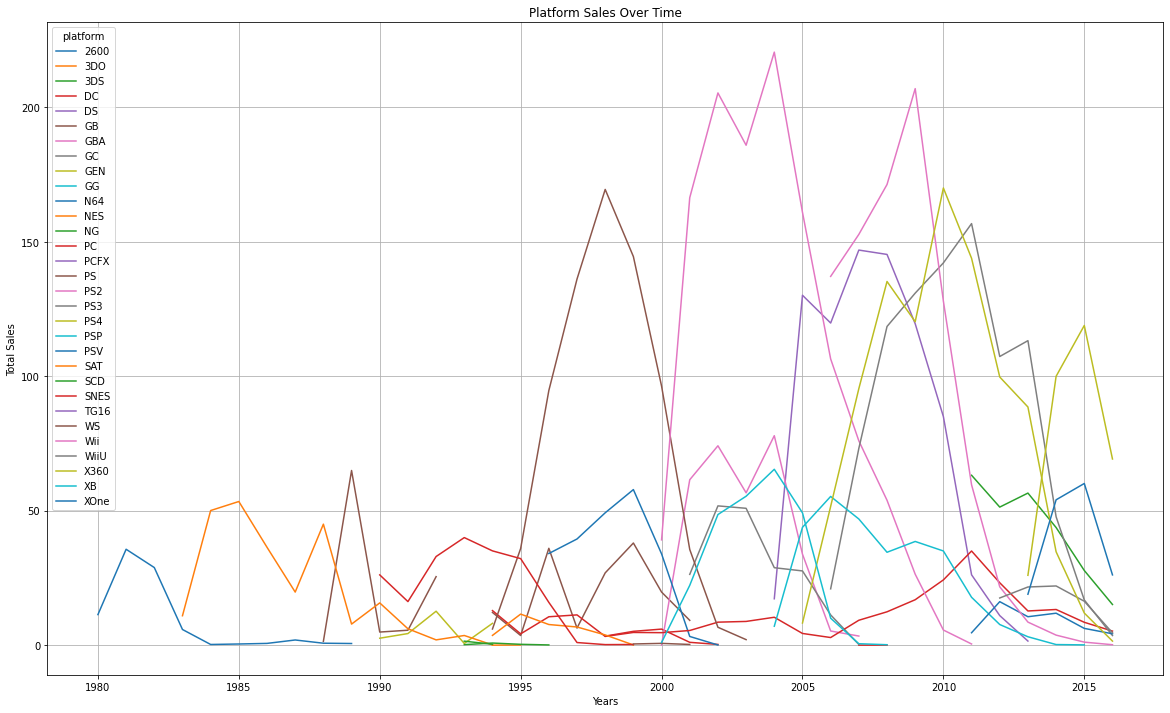

In [69]:
# plotando receitas de plataformas por ano

esrb_platform_sales.plot(grid=True, figsize=(20,12))
plt.xlabel('Years')
plt.ylabel('Total Sales')
plt.title('Platform Sales Over Time')
plt.show()

 ### sales x decades

In [70]:
# criando pivot table das vendas por decadas

sales_by_decades = pd.pivot_table(esrb, index='decades', values='total_sales', aggfunc='sum')

sales_by_decades = sales_by_decades.sort_values(by='total_sales', ascending=False)

sales_by_decades = sales_by_decades.reset_index()

sales_by_decades





,decades,total_sales
0,00s,5019.32
1,10s,1954.51
2,90s,1431.03
3,80s,425.83


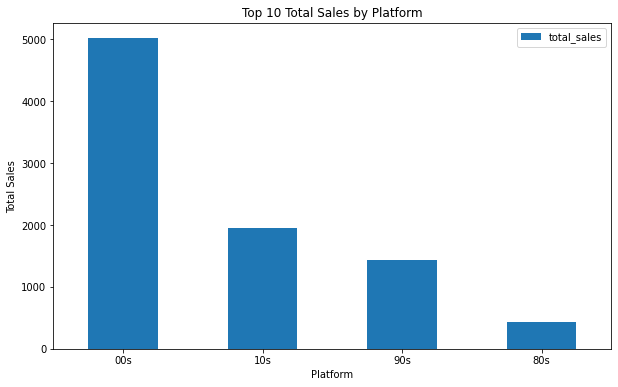

In [71]:
# visualizando vendas por decadas

sales_by_decades.plot(kind='bar', figsize=(10, 6), stacked=True, x='decades', y='total_sales')

plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.title('Top 10 Total Sales by Platform')
plt.xticks(rotation=0)
plt.show()

    uma análise extra sobre qual décadas tiveram maior número de vendas, e vemos que os anos 2000 tiveram maior número de vendas, porém, é preciso ponderar que os dados não contemplam os ultimos 4 anos da década 2010, já que ainda estamos em 2017.
    
    /
    
    An additional analysis on which decades had the highest number of sales reveals that the 2000s had the highest sales. However, it's important to note that the data does not include the last four years of the 2010s, as we are currently in 2017.

### top 5 sales x year

In [72]:
# filtrando dados pelas 5 marcas com maior receita em vendas de jogos

top5 = esrb.query('platform == "PS2" or platform == "X360" or platform == "Wii" or platform == "PS3" or platform == "DS"')

top5['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2'], dtype=object)

In [73]:
# criando tabela dinamica, plataformas por ano por soma de receita

top5_sales_year = pd.pivot_table(top5, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')


In [74]:
# resetando index

top5_sales_year.reset_index()

platform,year_of_release,DS,PS2,PS3,Wii,X360
0,2000,NaN,39.17,NaN,NaN,NaN
1,2001,NaN,166.43,NaN,NaN,NaN
2,2002,NaN,205.38,NaN,NaN,NaN
3,2003,NaN,185.93,NaN,NaN,NaN
4,2004,17.27,220.55,NaN,NaN,NaN
5,2005,130.14,160.98,NaN,NaN,8.25
6,2006,119.81,106.46,20.96,137.15,51.62
7,2007,146.94,75.99,73.19,152.77,95.42
8,2008,145.32,53.90,118.52,171.32,135.26
9,2009,119.54,26.40,130.93,206.97,120.29


In [75]:
top5_sales_year.describe()

platform,DS,PS2,PS3,Wii,X360
count,10.000000,12.000000,11.000000,11.000000,12.000000
mean,80.277000,103.940000,84.667273,81.016364,80.108333
std,59.797439,80.702099,54.637565,79.136330,57.489691
min,1.540000,0.450000,3.600000,0.180000,1.520000
25%,19.497500,35.977500,34.360000,6.170000,29.045000
50%,102.280000,91.225000,107.360000,59.650000,92.000000
75%,127.557500,171.305000,124.725000,144.960000,124.032500
max,146.940000,220.550000,156.780000,206.970000,170.030000


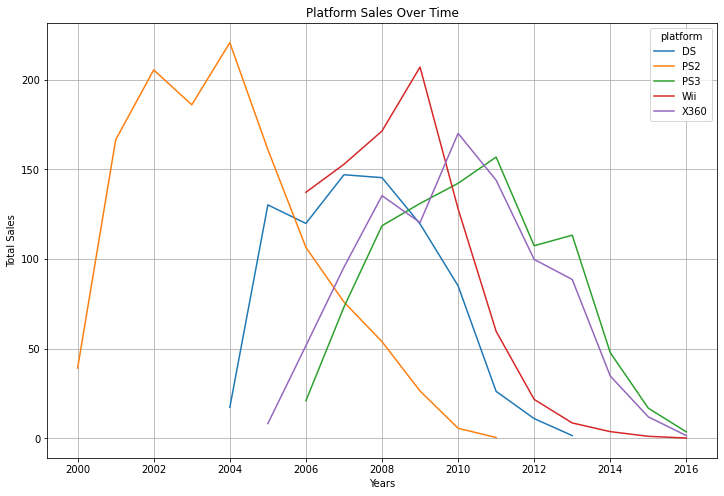

In [76]:
top5_sales_year.plot(grid=True, figsize=(12,8))
plt.xlabel('Years')
plt.ylabel('Total Sales')
plt.title('Platform Sales Over Time')
plt.show()

    filtramos os dados de acordo com as 5 plataformas com maiores numeros de vendas, e as plotamos no gráfico acima, que demonstra a quantidade de vendas de cada plataforma por ano. Podemos ver que o pico de vendas do ps2 em 2004 é o maior de todos, e em segundo ficou a plataforma 'wii' em 2009. As outras plataformas tiveram seu melhor ano em vendas similares uns aos outros. 
    É possível ver que as vendas do ps2 começam a cair no ano de lançamento do ps3 e que em 7 anos após o lançamento a vendas de jogos para essa plataforma chega a zero. Outra coisa que chama atenção são as vendas do 'wii', 'ps3' e 'xbox' sendo 0 todos no ano de 2016.
    
    /
    
    We filtered the data according to the top 5 platforms with the highest sales and plotted them in the above graph, which illustrates the quantity of sales for each platform per year. We can observe that the peak sales for PS2 in 2004 are the highest, with 'Wii' in 2009 coming in second. The other platforms had their best sales years, which are similar to each other.

    It's evident that the sales of PS2 start to decline in the year of the PS3 launch, and in 7 years after the launch, game sales for this platform drop to zero. Another noteworthy point is that the sales for 'Wii,' 'PS3,' and 'Xbox' are all zero in the year 2016

### bottom 5 sales x year

In [77]:
# filtrando dados pelas 5 plataformas com as piores receitas

bottom5 =  esrb.query('platform == "GB" or platform == "PSP" or platform == "PS4" or platform == "GBA" or platform == "PS"')

bottom5['platform'].unique()

array(['GB', 'GBA', 'PS4', 'PS', 'PSP'], dtype=object)

In [78]:
# criando tabela dinamica plataformas por ano por soma de receita

bottom5_sales_year = pd.pivot_table(bottom5, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

In [79]:
# resetando index

bottom5_sales_year.reset_index()

platform,year_of_release,GB,GBA,PS,PS4,PSP
0,1988,1.43,NaN,NaN,NaN,NaN
1,1989,64.97,NaN,NaN,NaN,NaN
2,1990,4.89,NaN,NaN,NaN,NaN
3,1991,5.57,NaN,NaN,NaN,NaN
4,1992,25.49,NaN,NaN,NaN,NaN
5,1994,12.18,NaN,6.03,NaN,NaN
6,1995,3.60,NaN,35.96,NaN,NaN
7,1996,36.03,NaN,94.70,NaN,NaN
8,1997,6.37,NaN,136.17,NaN,NaN
9,1998,26.90,NaN,169.49,NaN,NaN


In [80]:
bottom5_sales_year.describe()

platform,GB,GBA,PS,PS4,PSP
count,13.000000,8.000000,10.000000,4.000000,12.000000
mean,19.571538,39.110000,72.758000,78.535000,24.195000
std,18.465580,32.768255,63.351713,40.567917,20.241658
min,1.430000,0.070000,2.070000,25.990000,0.120000
25%,5.570000,4.810000,13.900000,58.435000,6.080000
50%,12.180000,45.265000,65.330000,84.625000,26.190000
75%,26.900000,64.687500,126.220000,104.725000,39.895000
max,64.970000,77.910000,169.490000,118.900000,55.320000


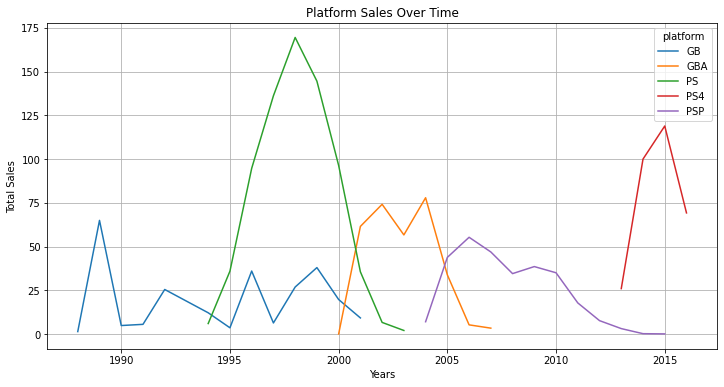

In [81]:
# plotando grafico para visualizar vendas por ano das 5 plataformas com a menor receita

bottom5_sales_year.plot(grid=True, figsize=(12,6))
plt.xlabel('Years')
plt.ylabel('Total Sales')
plt.title('Platform Sales Over Time')
plt.show()

    já as plataformas que tiveram o pior desempenho a plataforma 'ps' teve o melhor desempenho entre as piores, e o ps4 tem um pico em 2015, porem, ainda tem vendas em 2016
    
    /
    
    Among the platforms with the worst performance, 'PS' had the best performance among them, and the PS4 had a peak in 2015. However, it still had sales in 2016.

<AxesSubplot:>

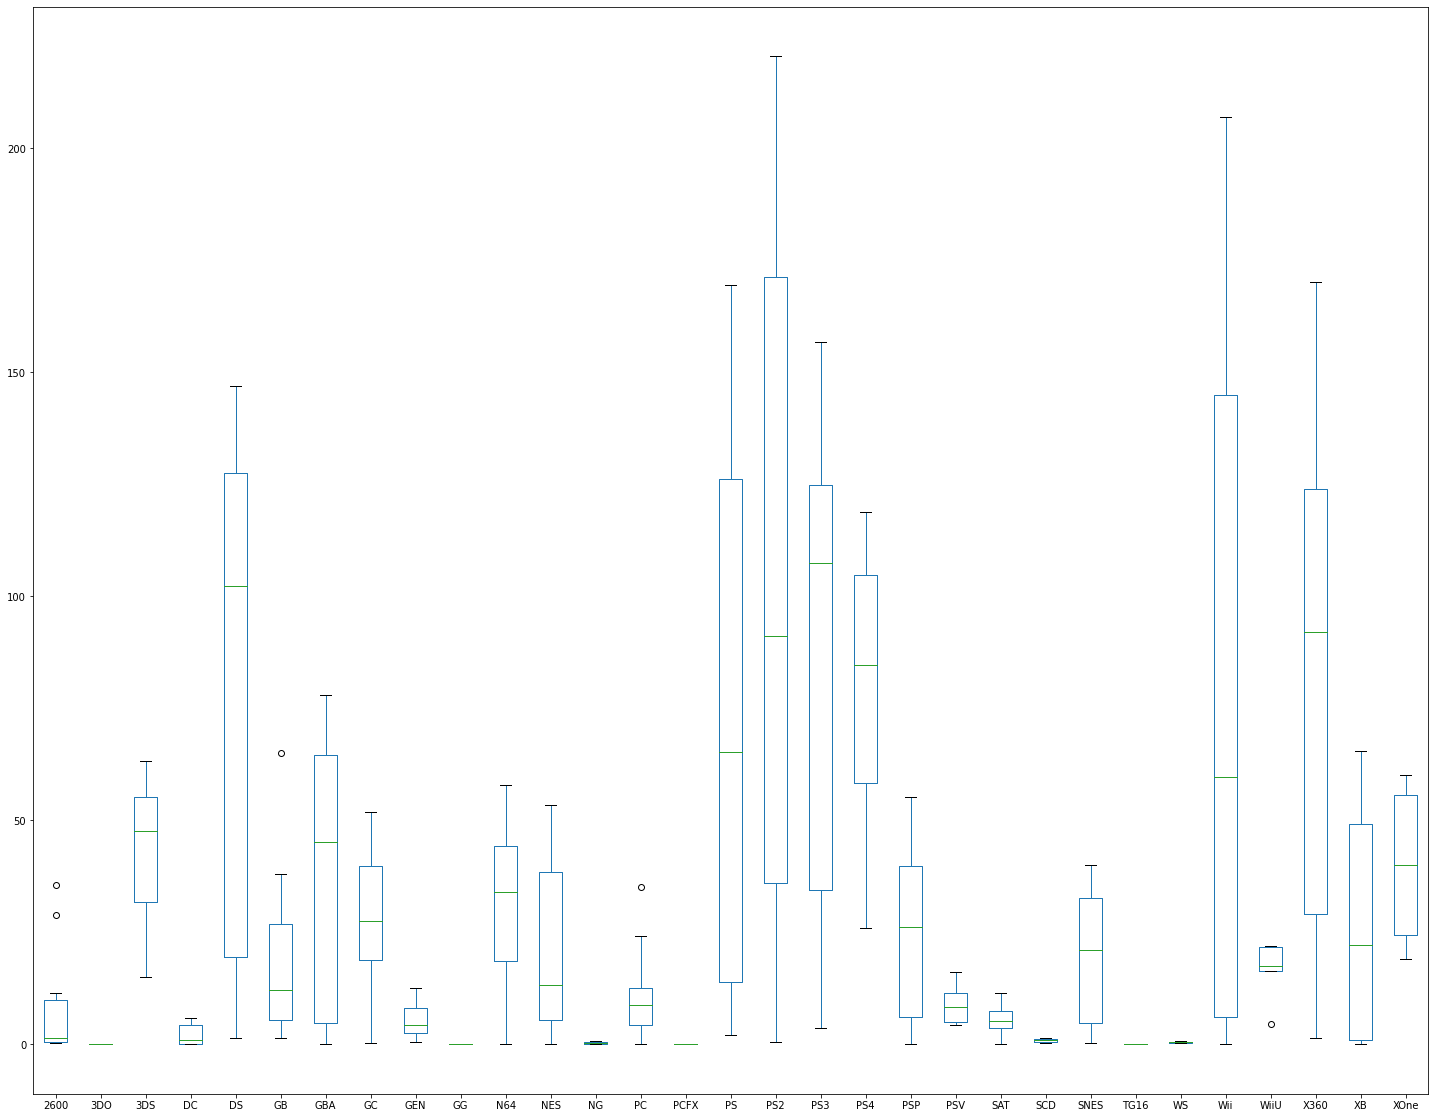

In [82]:
esrb_platform_sales.plot(kind='box', figsize = (25,20))

### fatiando dados sem 'year_of_release' outliers

In [83]:
esrb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16460 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16460 non-null  object 
 1   platform         16460 non-null  object 
 2   year_of_release  16460 non-null  Int32  
 3   genre            16460 non-null  object 
 4   na_sales         16460 non-null  float64
 5   eu_sales         16460 non-null  float64
 6   jp_sales         16460 non-null  float64
 7   other_sales      16460 non-null  float64
 8   critic_score     16460 non-null  float64
 9   user_score       16460 non-null  float64
 10  rating           16460 non-null  object 
 11  total_sales      16460 non-null  float64
 12  success_rate     16460 non-null  object 
 13  decades          16460 non-null  object 
dtypes: Int32(1), float64(7), object(6)
memory usage: 1.8+ MB


In [84]:
# fatindo os dados a partir de 1993

esrb_no_outliers_years = esrb.query('year_of_release >= 1993')

In [85]:
esrb_no_outliers_years.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,success_rate,decades
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54,outstanding,00s
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52,outstanding,00s
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77,outstanding,00s
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,69.003127,7.127793,ND,31.38,outstanding,90s
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.000000,8.500000,E,29.80,outstanding,00s


os dados foram fatiados a partir de 1993, assim, desconsiderando os outliers

/

The data has been sliced from 1993, thus excluding outliers

### plataformas que ainda estão no mercado

In [86]:
# definindo plataformas que ainda estao no mercado

esrb_platform_on_market = esrb_no_outliers_years.query('year_of_release == 2016')

In [87]:
# plataformas ainda no mercado

esrb_platform_on_market['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

In [88]:
# salvando dados de plataformas que ainda estao no mercado

esrb_platform_on_market = esrb_no_outliers_years.query('platform == ["PS4", "3DS", "XOne", "WiiU", "PS3", "PC", "X360", "PSV", "Wii"]')

In [89]:
esrb_platform_on_market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6504 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6504 non-null   object 
 1   platform         6504 non-null   object 
 2   year_of_release  6504 non-null   Int32  
 3   genre            6504 non-null   object 
 4   na_sales         6504 non-null   float64
 5   eu_sales         6504 non-null   float64
 6   jp_sales         6504 non-null   float64
 7   other_sales      6504 non-null   float64
 8   critic_score     6504 non-null   float64
 9   user_score       6504 non-null   float64
 10  rating           6504 non-null   object 
 11  total_sales      6504 non-null   float64
 12  success_rate     6504 non-null   object 
 13  decades          6504 non-null   object 
dtypes: Int32(1), float64(7), object(6)
memory usage: 743.1+ KB


In [90]:
# criando tabela dinamica de vendas por ano por plataforma

platform_market_sales_year =  pd.pivot_table(esrb_platform_on_market, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

In [91]:
# visualizando tabela dinamica 'platform_market_sales_year'

platform_market_sales_year

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
1994,NaN,12.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,4.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,10.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,11.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,3.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,4.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,4.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,5.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
platform_market_sales_year.describe()

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
count,6.000000,23.000000,11.000000,4.000000,6.000000,11.000000,5.000000,12.000000,4.000000
mean,42.968333,11.000435,84.667273,78.535000,8.968333,81.016364,16.438000,80.108333,39.830000
std,18.278261,7.779177,54.637565,40.567917,4.729695,79.136330,7.068244,57.489691,20.313977
min,15.140000,2.850000,3.600000,25.990000,4.250000,0.180000,4.600000,1.520000,18.960000
25%,31.775000,4.995000,34.360000,58.435000,5.035000,6.170000,16.350000,29.045000,24.352500
50%,47.560000,9.280000,107.360000,84.625000,8.420000,59.650000,17.560000,92.000000,40.110000
75%,55.267500,12.800000,124.725000,104.725000,11.572500,144.960000,21.650000,124.032500,55.587500
max,63.200000,35.030000,156.780000,118.900000,16.190000,206.970000,22.030000,170.030000,60.140000


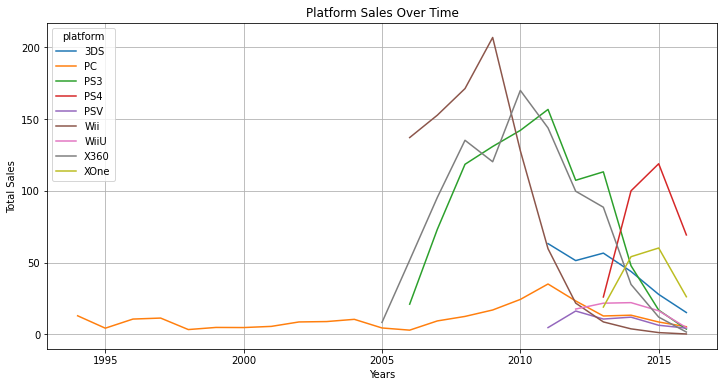

In [93]:
platform_market_sales_year.plot(grid=True, figsize=(12,6))
plt.xlabel('Years')
plt.ylabel('Total Sales')
plt.title('Platform Sales Over Time')

plt.show()

    dentre as empresas que ainda registram receita em 2016, vemos que 'wii' teve um pico maior do que qualquer outra e que sua receita no ano de lançamento também é maior do que qualquer outra.

    Interessante ver que, dentre as plataformas que ainda estão no mercado, o ano de 2013 é o ano em que todas contém dados de receitas.
    
    /
    
    Among the companies that still recorded revenue in 2016, we observe that 'Wii' had a higher peak than any other and that its revenue in the launch year is also higher than any other.

    It's interesting to note that among the platforms still in the market, the year 2013 is the year in which all of them have revenue data

### dados de plataformas com vendas após 2013

In [94]:
# fatiando os dados a partir de 2013 

relevant_years_esrb = esrb.query('year_of_release >= 2013')

In [95]:
relevant_years_esrb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234 entries, 16 to 16714
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2234 non-null   object 
 1   platform         2234 non-null   object 
 2   year_of_release  2234 non-null   Int32  
 3   genre            2234 non-null   object 
 4   na_sales         2234 non-null   float64
 5   eu_sales         2234 non-null   float64
 6   jp_sales         2234 non-null   float64
 7   other_sales      2234 non-null   float64
 8   critic_score     2234 non-null   float64
 9   user_score       2234 non-null   float64
 10  rating           2234 non-null   object 
 11  total_sales      2234 non-null   float64
 12  success_rate     2234 non-null   object 
 13  decades          2234 non-null   object 
dtypes: Int32(1), float64(7), object(6)
memory usage: 255.3+ KB


In [96]:
# criando tabela dinamica entre total_sales por year_of_release de cada plataforma

platform_sales_year =  pd.pivot_table(relevant_years_esrb, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

In [97]:
platform_sales_year

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.73,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [98]:
# descrevendo os dados de plataformas com vendas a partir de 2013

platform_sales_year.describe()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,4.000000,1.00,4.00000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,35.812500,1.54,9.94500,45.357500,78.535000,1.166667,8.247500,3.415000,16.157500,34.200000,39.830000
std,18.128338,NaN,3.78383,48.898675,40.567917,1.710010,3.596205,3.765355,8.129507,38.816131,20.313977
min,15.140000,1.54,5.25000,3.600000,25.990000,0.120000,4.250000,0.180000,4.600000,1.520000,18.960000
25%,24.620000,1.54,7.70250,13.515000,58.435000,0.180000,5.750000,0.900000,13.412500,9.350000,24.352500
50%,35.770000,1.54,10.62500,32.290000,84.625000,0.240000,8.420000,2.445000,19.000000,23.350000,40.110000
75%,46.962500,1.54,12.86750,64.132500,104.725000,1.690000,10.917500,4.960000,21.745000,48.200000,55.587500
max,56.570000,1.54,13.28000,113.250000,118.900000,3.140000,11.900000,8.590000,22.030000,88.580000,60.140000


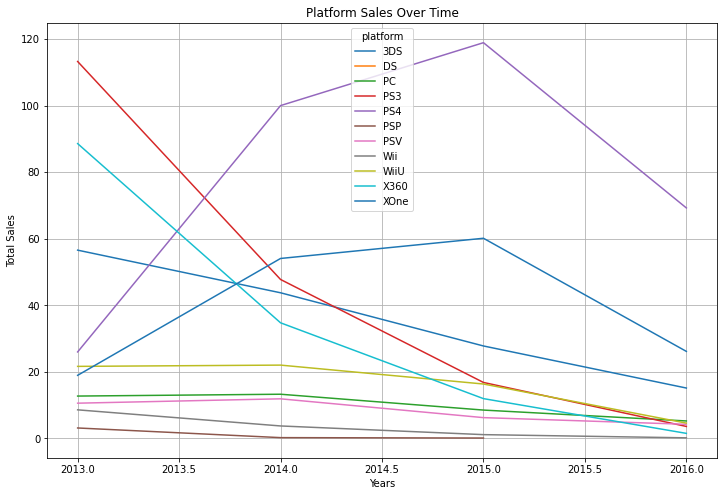

In [99]:
# plotando grafico de receita de plataformas a partir de 2013

platform_sales_year.plot(grid=True, figsize=(12,8))
plt.xlabel('Years')
plt.ylabel('Total Sales')
plt.title('Platform Sales Over Time')
plt.show()

    pelos gráficos de receita por plataformas a partir de 2013, vemos que a lider em vendas é 'ps4' com mais que o dobro do que a segunda colocada em vendas 'XboxOne', que tem quase o dobro da terceira colocada '3DS'. Abaixo todas as outras tem valores de receita similares.
    
    /
    
    From the revenue graphs per platform starting in 2013, we can observe that the sales leader is 'PS4,' with more than double the sales of the second-highest, 'Xbox One,' which, in turn, has almost double the revenue of the third-placed '3DS.' Below these, all other platforms have similar revenue values.

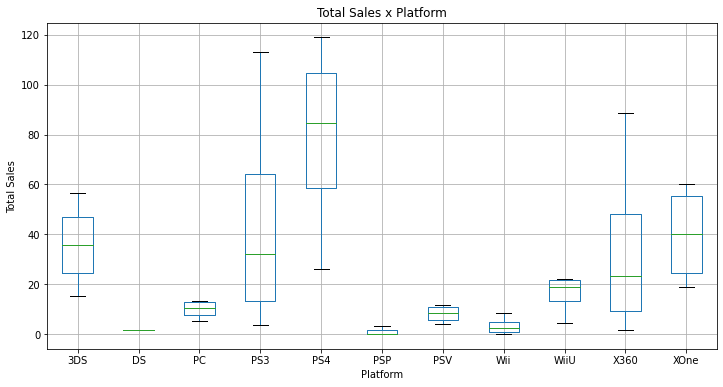

In [100]:
# plotando box da receita de cada plataforma

platform_sales_year.boxplot(figsize=(12,6))
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.title('Total Sales x Platform')
plt.show()

    complementando a informação do gráfico anterior ao 'boxplot' podemos ver a mediana de receita do 'PS4' sendo a maior de todas. Embora o PS3 esteja em segundo com maior receita, vemos que a receita mediana do '3DS' e 'XOne' é superior a do 'PS3'
    
    /
    
    
    Adding to the information from the previous 'boxplot' chart, we can see the median revenue of 'PS4' being the highest of all. Although 'PS3' is second in terms of total revenue, we observe that the median revenue of '3DS' and 'XOne' is higher than that of 'PS3'.

### rating x sales

In [101]:
relevant_years_esrb.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,success_rate,decades
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.200000,M,21.05,successful,10s
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.100000,M,16.27,successful,10s
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,69.003127,7.127793,ND,14.63,successful,10s
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,69.003127,7.127793,ND,14.60,successful,10s
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.000000,8.300000,M,12.62,successful,10s


In [102]:
# filtrando dados apenas plataforma 'ps4'

ps4_relevant_years_esrb = relevant_years_esrb.query('platform == "PS4"')

In [103]:
# criando pivot table rating x total_sales

ps4_rating_sales = pd.pivot_table(ps4_relevant_years_esrb, index='rating', values='total_sales', aggfunc='sum')

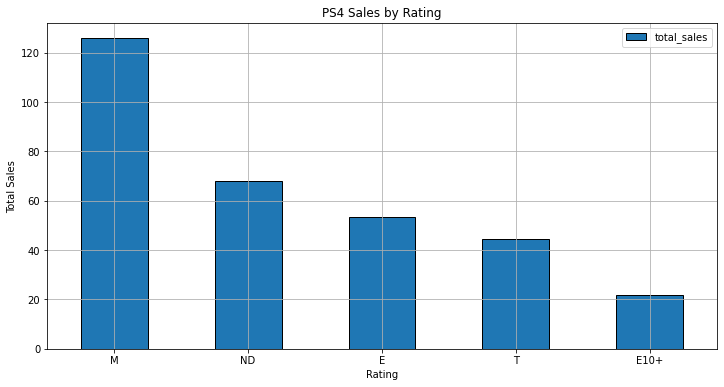

In [104]:
# plotando vendas por classificação de jogo

ps4_rating_sales.sort_values(by='total_sales', ascending=False).plot(kind='bar',figsize=(12,6), edgecolor='black', grid='True')
plt.xlabel('Rating')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.title('PS4 Sales by Rating')
plt.show()

    entre a plataforma ps4, podemos afirmar que jogos categorizados 'mature' são lider em vendas, entre os nossos dados, vemos em segundo lugar os de classificação não definida. Portanto, diremos que a segunda maior receita por classificação vem dos jogos 'everyone', em terceio os 'teen' e por ultimo 'everyone + 10'
    
    /
    
    Among the PS4 platform, we can affirm that games categorized as 'Mature' are leading in sales. Among our data, those with 'Not Defined' rating come in second place. Therefore, we can say that the second-highest revenue by rating comes from 'Everyone' games, followed by 'Teen,' and lastly, 'Everyone + 10'.

### critic score x sales

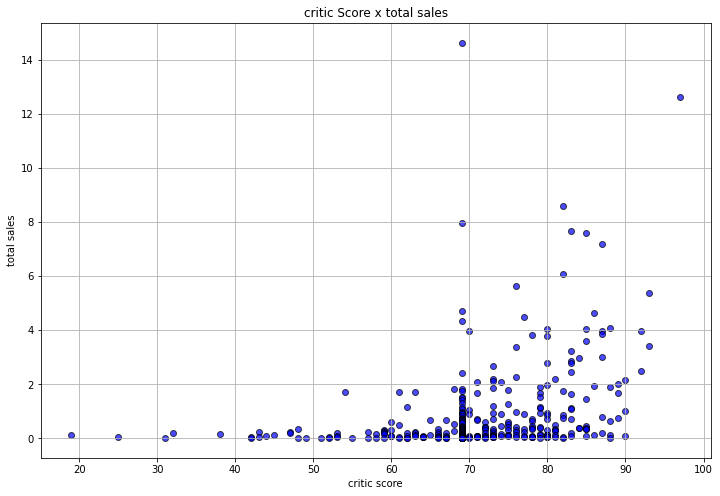

In [105]:
# plotando grafico de dispersão vendas x nota da critica

plt.figure(figsize=(12, 8))
plt.scatter(ps4_relevant_years_esrb['critic_score'], ps4_relevant_years_esrb['total_sales'], alpha=0.7, c='blue', edgecolors='k')
plt.grid(True)
plt.xlabel('critic score')
plt.ylabel('total sales')
plt.title('critic Score x total sales')
plt.show()

    dentre as vendas na plataforma ps4, vemos que a receita esta diretamente ligada com os pontos dados pela crítica especializada em jogos, quanto maior o score, maior a receita. Sendo que jogos com 'score' acima dos 70 se destacam, abaixo disso não vemos nenhuma receita acima dos 2 milhões.
    
    /
    
    Among the sales on the PS4 platform, we can see that revenue is directly linked to the points given by specialized game critics. The higher the score, the higher the revenue. Games with a score above 70 stand out, as we don't see any revenue above 2 million for scores below that threshold.

### user score x sales

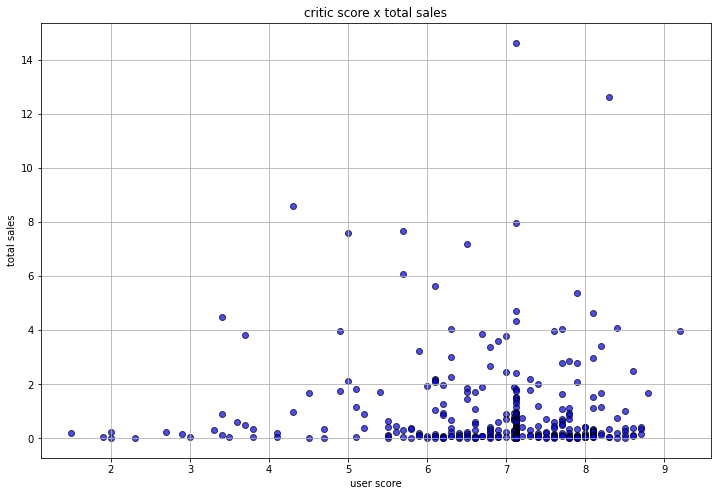

In [106]:
# plotando grafico de dispersão, vendas x notas do usuário

plt.figure(figsize=(12, 8))
plt.scatter(ps4_relevant_years_esrb['user_score'], ps4_relevant_years_esrb['total_sales'], alpha=0.7, c='blue', edgecolors='k')
plt.grid(True)
plt.xlabel('user score')
plt.ylabel('total sales')
plt.title('critic score x total sales')
plt.show()

    já quando comparamos a receita dos jogos da plataforma ps4 pela nota do usuário. Vemos que a partir do 'score' 5 encontramos maior incididencia de jogos com receita acima dos 4 milhões. Vale destacar que o jogo com maior receita não é o que tem a nota máxima.
    
    /
    
    When we compare the revenue of PS4 platform games based on user scores, we see that from a 'score' of 5, there is a higher incidence of games with revenue above 4 million. It's worth noting that the game with the highest revenue is not necessarily the one with the maximum score

### genre x sales

In [107]:
# criando pivot table genero x vendas totais

genre_sales = pd.pivot_table(relevant_years_esrb, index='genre',values='total_sales', aggfunc='sum')

In [108]:
# ordenando os dados por 'total_sales'

genre_sales.sort_values(by='total_sales', ascending=False, inplace=True)

genre_sales

,total_sales
genre,
Action,322.22
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


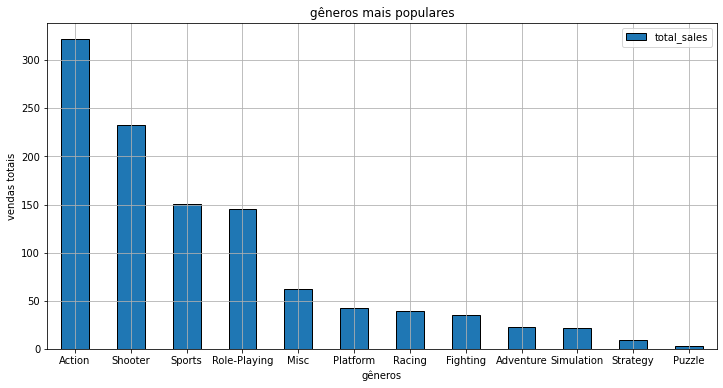

In [109]:
# plotando quais generos geram maior receita

genre_sales.plot(kind='bar', figsize=(12,6), edgecolor='black', grid='True')
plt.title('gêneros mais populares')
plt.xlabel('gêneros')
plt.ylabel('vendas totais')
plt.xticks(rotation=0)
plt.show()



    quando vemos quais gêneros de jogos geram mais receitas dentre todas as plataformas, vemos jogos de ação liderando as vendas em segundo jogos de tiro. Vemos na terceira posição os jogos de esporte, vale destacar que a receita gerada por esporte são menos do que a metade gerada pelo genero mais popular. Quase empatado com esportes o gênero RPG vem em quarto.
    
    /
    
    When we examine which game genres generate the most revenue across all platforms, we see action games leading in sales, followed by shooter games in second place. In the third position, we find sports games, and it's worth noting that the revenue generated by sports games is less than half of that generated by the most popular genre. Almost tied with sports, the RPG genre comes in fourth.

In [110]:
# criando tabela dinamica da soma de receita por genero

ps4_genre_sales = pd.pivot_table(ps4_relevant_years_esrb, index='genre', values='total_sales', aggfunc='sum')

In [111]:
ps4_genre_sales.sort_values(by='total_sales', ascending=False, inplace=True)

ps4_genre_sales

,total_sales
genre,
Action,96.10
Shooter,88.56
Sports,55.61
Role-Playing,28.99
Racing,12.14
Fighting,8.65
Misc,8.19
Platform,7.69
Adventure,6.34


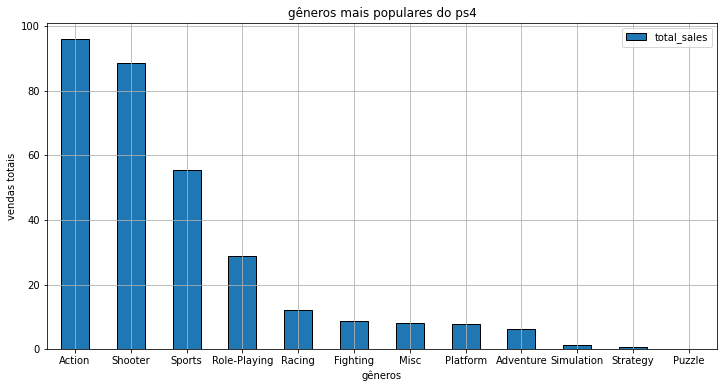

In [112]:
# plotando grafico

ps4_genre_sales.plot(kind='bar', figsize=(12,6), edgecolor='black', grid='True')
plt.title('gêneros mais populares do ps4')
plt.xlabel('gêneros')
plt.ylabel('vendas totais')
plt.xticks(rotation=0)
plt.show()

    quando apenas visualizamos quais o gêneros mais populares entre os usuários da plataforma ps4, encontramos os três primeiros colocados iguais aos quando vemos entre todas as plataformas, porém a diferença entre o primeiro e segundo colocado em número de receita é mais parelha. E o gênero de esportes não se encontra tão atrás dos dois primeiros colocados.
    
    /
    
    When we specifically look at the most popular genres among PS4 users, we find that the top three genres are the same as when considering all platforms. However, the difference in revenue between the first and second place is more evenly matched. Additionally, the sports genre is not as far behind the top two genres in terms of revenue

### market share

In [113]:
# salvando dados da empresa sony em uma variavel

sony_relevant_years = relevant_years_esrb.query('platform == "PS3" or platform == "PS4" or platform == "PSV" or platform == "PSP"')

In [114]:
# salvando dados da empresa nintendo em uma variavel

nintendo_relevant_years = relevant_years_esrb.query('platform == "3DS" or platform == "WiiU" or platform == "Wii" or platform == "DS" ')

In [115]:
# salvando dados da empresa microsoft em uma variavel

microsoft_relevant_years = relevant_years_esrb.query('platform == "X360" or platform == "XOne" or platform == "PC"')

In [116]:
# calculando total de receita para cada empresa

microsoft_total_sales = microsoft_relevant_years['total_sales'].sum()
nintendo_total_sales = nintendo_relevant_years['total_sales'].sum()
sony_total_sales = sony_relevant_years['total_sales'].sum()

In [117]:
# criando DataFrame para salvar receita total das empresas

market_share_data = pd.DataFrame({
    'company': ['Microsoft', 'Nintendo', 'Sony'],
    'total_sales': [microsoft_total_sales, nintendo_total_sales, sony_total_sales]
})

In [118]:
# calculando total de receita entre as empresas e salvando sua porcentagem

total_sales_all_companies = market_share_data['total_sales'].sum()
market_share_data['market_share'] = (market_share_data['total_sales'] / total_sales_all_companies) * 100

In [119]:
# ordenando por fatia de mercado e visualizando resultado

market_share_data.sort_values(by='market_share', ascending=False, inplace=True)

market_share_data

,company,total_sales,market_share
2,Sony,532.06,48.766315
0,Microsoft,335.90,30.787139
1,Nintendo,223.08,20.446546


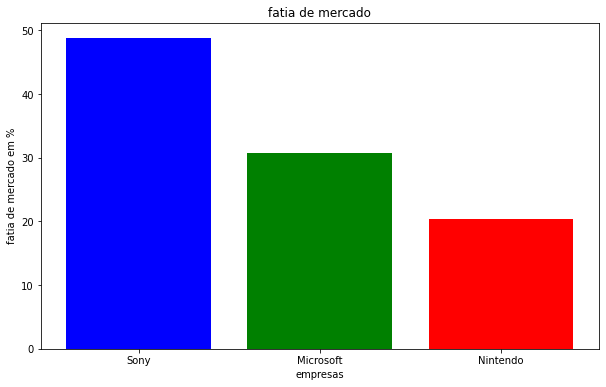

In [120]:
# plotando grafico com fatia de mercado para cada empresa

plt.figure(figsize=(10, 6))
plt.bar(market_share_data['company'], market_share_data['market_share'], color=['blue', 'green', 'red'])
plt.title('fatia de mercado')
plt.xlabel('empresas')
plt.ylabel('fatia de mercado em %')
plt.show()

    quando analisamos a fatia de mercado entre as empresas donas da plataformas, vemos que 'sony' detem de quase metade da fatia  com quase a soma entre microsoft e nitendo.
    
    /
    
    When we analyze the market share among the companies that own gaming platforms, we observe that Sony holds almost half of the market share, which is nearly the combined share of Microsoft and Nintendo

## profile per region

### north america

In [121]:
# criando pivot table plataforma por vendas na america do norte

platform_na_sales = pd.pivot_table(relevant_years_esrb, index='platform', values='na_sales', aggfunc='sum')

In [122]:
# ordenando por maior receita

platform_na_sales.sort_values(by='na_sales', ascending=False, inplace=True)

platform_na_sales

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.17
Wii,6.56
PSV,5.04


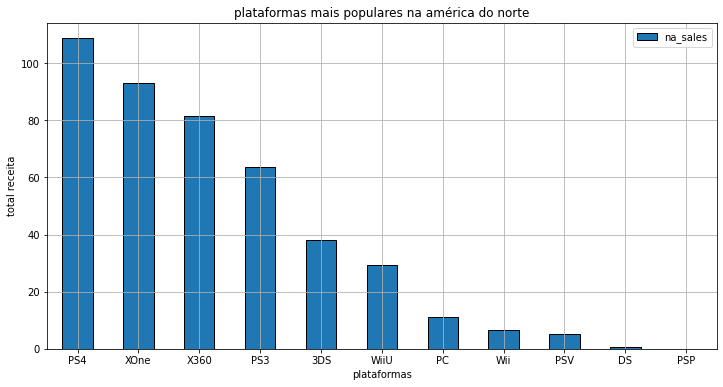

In [123]:
# plotando vendas x plataforma na amarica do norte

platform_na_sales.plot(kind='bar',figsize=(12,6), edgecolor='black', grid='True')
plt.title('plataformas mais populares na américa do norte')
plt.xlabel('plataformas')
plt.ylabel('total receita')
plt.xticks(rotation=0)
plt.show()

    vendo o grafico de receita por plataforma dentro dos usuários da américa do norte, vemos ps4 liderando em vendas com xbox one e xbox 360 a seguir, respectivamente
    
    /
    
    Looking at the revenue chart per platform within North American users, we see the PS4 leading in sales, followed by the Xbox One and Xbox 360, respectively.

In [124]:
# criando tabela genero x vendas na america do norte

genre_na_sales = pd.pivot_table(relevant_years_esrb, index='genre', values='na_sales', aggfunc='sum')

In [125]:
# ordenando por maior receita

genre_na_sales.sort_values(by='na_sales', ascending=False, inplace=True)

genre_na_sales

,na_sales
genre,
Action,126.11
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


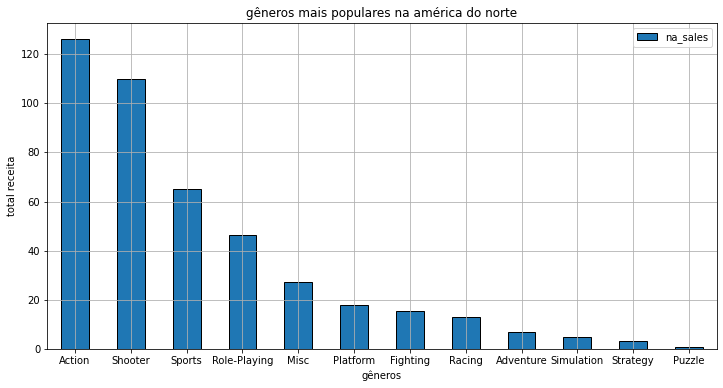

In [126]:
# plotando receita por genero de jogos na america do norte

genre_na_sales.plot(kind='bar',figsize=(12,6), edgecolor='black', grid='True')
plt.title('gêneros mais populares na américa do norte')
plt.xlabel('gêneros')
plt.ylabel('total receita')
plt.xticks(rotation=0)
plt.show()

    dentre os gêneros mais populares na américa do norte, vemos ação, tiro e esportes na três primeiras posições. Também podemos dizer que a preferência segue a tendencia mundial.
    
    /    
    
    Among the most popular genres in North America, we see action, shooter, and sports in the top three positions. We can also say that the preference follows the global trend.

### europe 

In [127]:
# criando tabela dinamica plataforma x vendas na europa

platform_eu_sales = pd.pivot_table(relevant_years_esrb, index='platform', values='eu_sales', aggfunc='sum')

In [128]:
# ordenando por maior receita

platform_eu_sales.sort_values(by='eu_sales', ascending=False, inplace=True)

platform_eu_sales

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.61
WiiU,19.85
PSV,6.10
Wii,5.93


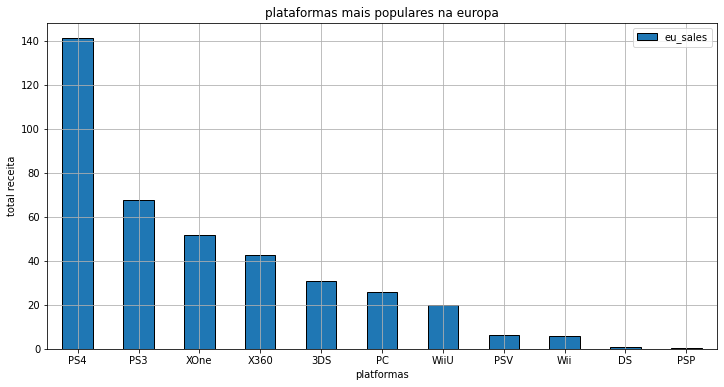

In [129]:
# plotando dados receita por plataforma na europa

platform_eu_sales.sort_values(by='eu_sales', ascending=False).plot(kind='bar',figsize=(12,6), edgecolor='black', grid='True')
plt.title('plataformas mais populares na europa')
plt.xlabel('platformas')
plt.ylabel('total receita')
plt.xticks(rotation=0)
plt.show()

    dentra as plataformas mais populares na europa, vemos que ps4 lidera, com mais que o dobro da segunda plataforma mais popular, o ps3. Diferente do resultados da américa do norte XOne ocupa apenas a terceira posição na popularidade.
    
    /
    
    Within the most popular platforms in Europe, we observe that the PS4 is in the lead, with more than twice the popularity of the second most popular platform, the PS3. In contrast to the results in North America, the Xbox One occupies only the third position in popularity

In [130]:
# criando tabela dinamica genero x vendas na europa 

genre_eu_sales = pd.pivot_table(relevant_years_esrb, index='genre', values='eu_sales', aggfunc='sum')

In [131]:
# ordenanos por maior receita

genre_eu_sales.sort_values(by='eu_sales', ascending=False, inplace=True)

genre_eu_sales

,eu_sales
genre,
Action,118.38
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


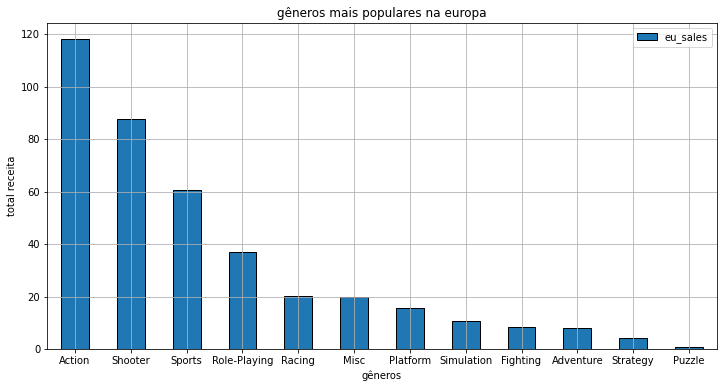

In [132]:
# plotando dados receita por genero na europa

genre_eu_sales.sort_values(by='eu_sales', ascending=False).plot(kind='bar',figsize=(12,6), edgecolor='black', grid='True')
plt.title('gêneros mais populares na europa')
plt.xlabel('gêneros')
plt.ylabel('total receita')
plt.xticks(rotation=0)
plt.show()

    dentre os generos mais populares, novamente vemos um grafico parecido quando visualizamos a preferência mundial. Ação, tiro e esportes ocupandos os 3 primeiros lugares. 
    
    /
    
    
    Among the most popular genres, once again, we observe a similar pattern when considering global preferences. Action, shooter, and sports take the top three 

### japan

In [133]:
# criando tabela dinamica plataforma x receita japão

platform_jp_sales = pd.pivot_table(relevant_years_esrb, index='platform', values='jp_sales', aggfunc='sum')

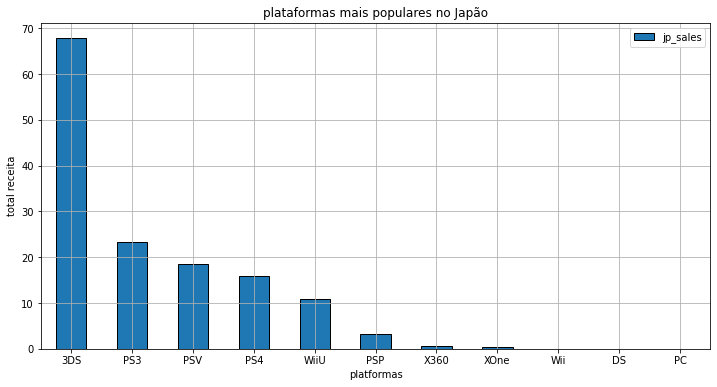

In [134]:
# plotando dados receita x plataforma no japão

platform_jp_sales.sort_values(by='jp_sales', ascending=False).plot(kind='bar',figsize=(12,6), edgecolor='black', grid='True')
plt.title('plataformas mais populares no Japão')
plt.xlabel('platformas')
plt.ylabel('total receita')
plt.xticks(rotation=0)
plt.show()

     dentre as plataformas mais populares no Japão, 3DS em primeiro, PS3 em segundo e PSV em terceiro. Resultado diferente quando comparamos com os resultados dos continentes ocidentais.
     
     /
     
     Among the most popular platforms in Japan, the 3DS takes the lead, followed by the PS3 in second place and the PSV (PlayStation Vita) in third. This result differs when compared to the results in Western continents

In [135]:
# criando tabela dinamica genero x vendas no japão

genre_jp_sales = pd.pivot_table(relevant_years_esrb, index='genre', values='jp_sales', aggfunc='sum')

In [136]:
# ordenando por total de receita

genre_jp_sales.sort_values(by='jp_sales', ascending=False, inplace=True)

genre_jp_sales

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


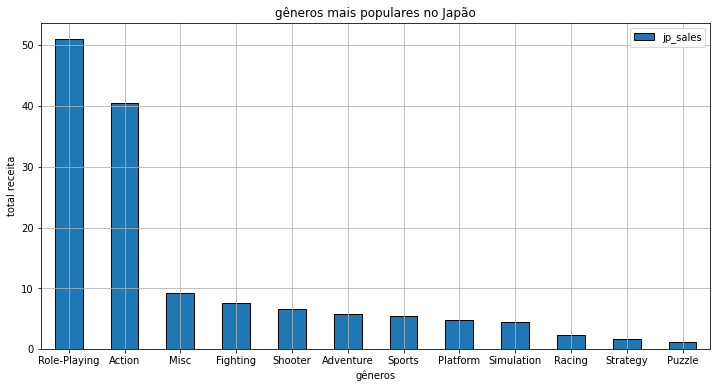

In [137]:
genre_jp_sales.plot(kind='bar',figsize=(12,6), edgecolor='black', grid='True')
plt.title('gêneros mais populares no Japão')
plt.xlabel('gêneros')
plt.ylabel('total receita')
plt.xticks(rotation=0)
plt.show()

    dentre os gêneros populares, vemos RPG, ação e diversos, entre primeiro e terceiro mais populares, respectivamente. Vale destacar a difrença brutal de receita entre o primeiro e o terceiro colocado. Sendo o primeiro quase 5 vezes mais popular que o terceiro.
    
    /
    
    
    Among the popular genres, we see RPG, action, and miscellaneous, as the first, second, and third most popular, respectively. It's worth highlighting the significant difference in revenue between the first and third positions, with the first being almost 5 times more popular than the third

## testing hypotesis

###  xbox one x pc hypotesis

Hipotese Nula : A classificacao media dos usuarios das plataformas xbox one e PC sao iguais

Hipotese Alternativa : A classificacao media dos usuarios das plataformas xbox one e PC sao diferentes

/


Null Hypothesis: The average ratings of users on the Xbox One and PC platforms are equal.

Alternative Hypothesis: The average ratings of users on the Xbox One and PC platforms are different.

In [138]:
# filtrando dados apenas para plataforma 'xbox one'

xbox_relevant_years = relevant_years_esrb.query('platform == "XOne"')

In [139]:
# filtrando dados apenas para plataforma 'PC'

pc_relevant_years = relevant_years_esrb.query('platform == "PC"')

In [140]:
# definindo valor alpha

alpha = 0.05

In [141]:
# utilizando teste de levene para definir se equal_var = False ou True

statistic, p_value = levene(xbox_relevant_years['user_score'], pc_relevant_years['user_score'])

In [142]:
# resultado do teste de levene

print("Levene's test statistic:", statistic)
print("p-value:", p_value)

Levene's test statistic: 10.330850996311305
p-value: 0.0014056414577134435


In [143]:
# funcao if para demonstrar se equal_var e falso ou verdadeiro

if p_value < alpha:
    equal_var = False
else:
    equal_var = True

In [144]:
# fazendo ttest entre a media de receitas dos usarios de cada plano

results = st.ttest_ind(xbox_relevant_years['user_score'], pc_relevant_years['user_score'], equal_var = equal_var)

In [145]:
# imprimindo p-valor

print('p-value :', results.pvalue)

p-value : 0.08038345479623801


In [146]:
# resultado do teste

if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula')
else:
    print("Nós não podemos rejeitar a hipótese nula")

Nós não podemos rejeitar a hipótese nula


### action x sports hypotesis

Hipotese Nula : A classificação média dos usuários dos gêneros ação e esporte sao iguais.

Hipotese Alternativa : A classificação média dos usuários dos gêneros ação e esporte **não** sao iguais.

/


Null Hypothesis: The average ratings of users in the action and sports genres are equal.

Alternative Hypothesis: The average ratings of users in the action and sports genres are not equal.

In [147]:
relevant_years_esrb['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', 'Fighting',
       'Racing', 'Simulation', 'Platform', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

In [148]:
action_relevant_years = relevant_years_esrb.query('genre == "Action"')

In [149]:
sports_relevant_years = relevant_years_esrb.query('genre == "Sports"')

In [150]:
# definindo valor alpha

alpha = 0.05

In [151]:
# utilizando teste de levene para definir se equal_var = False ou True

statistic1, p_value1 = levene(action_relevant_years['user_score'], sports_relevant_years['user_score'])

In [152]:
# resultado do teste de levene

print("Levene's test statistic:", statistic1)
print("p-value:", p_value1)

Levene's test statistic: 168.2408316718872
p-value: 1.2822224919047884e-35


In [153]:
# funcao if para demonstrar se equal_var e falso ou verdadeiro

if p_value1 < alpha:
    equal_var = False
else:
    equal_var = True

In [154]:
# fazendo ttest entre a media de receitas dos usarios de cada plano

results1 = st.ttest_ind(action_relevant_years['user_score'], sports_relevant_years['user_score'], equal_var = equal_var)

In [155]:
# imprimindo p-valor

print('p-value :', results1.pvalue)

p-value : 1.2459268632027259e-20


In [156]:
# resultado do teste

if results1.pvalue < alpha:
    print('Rejeitamos a hipótese nula')
else:
    print("Nós não podemos rejeitar a hipótese nula")

Rejeitamos a hipótese nula


## Conclusão

Os dados foram carregados normalmente, primeiramente identificamos alguns tipos de dados que precisavam ser mudados, a seguir foram identificados a quantidade total de e entradas e quantos valores ausentes haviam. Os dados de 'year_of_release', 'critic_score', 'user_score', 'rating' e 'name' continham valores ausentes.

Começamos padronizando todos os nomes das colunas, e mudando o tipo de dados em 'year_of_release' para o formato de datas.

Tratamos os dois valores ausentes em 'name', deletando, já que eram dois jogos antigos e com pouca relevância quando vemos os valores de vendas.

Em 'year_of_release' copiei 4 valores numéricos dentro da string 'name' de alguns jogosque a continham e transferi-os para uma nova coluna, buscando números que representassem as datas de lançamento dos jogos, apenas 17 dos 269 valores ausentes foram preenchidos an coluna 'year_of_release'. Na sequência decidi por deletar os dados incompletos, já que representavam menos de 2% de todos os dados.

Em 'rating' foram encontrados 6681 valores ausentes, que representam grande parte dos dados, portanto, decidi por preencher os valores ausentes desse dados qualitativo por 'ND' (not defined).

Em 'critic_score' percebi que a media e a mediana eram muito próximas, mostrando uma distribuição simétrica dos dados e decidi por usar a média para preencher os 8465 dados ausentes.

Em 'user_score' substitui os valores 'tbd' (to be determined) com os valores médios dos scores, já que também seus dados mostravam uma distribuição simétrica. Também usei a mesma média para substituir os valores ausentes.

Os dados foram enriquecidos adicionando uma coluna com o total de vendas entre todos as regiões para determinar a receita total de cada jogo e a posteriori calcular a receita total de cada plataforma.

Também categorizei os jogos entre fracassos, satisfatórios, sucessos e extraordinários, baseado na receita total dos jogos.
Criei uma coluna categórica de decadas, para rotular de qual década cada jogo se encontra, para que possamos fazer uma análise por décadas.

Assim, começamos a análise dos dados.

Constatamos um pico de lançamento de jogos entre 2007 e 2011, vimos que os limites inferiores estão por volta de 1993.

Quando analisamos as 10 plataformas com maior receita entre todos os dados, vimos que PS2 é a plataforma mais bem-sucedida até o momento, os dados contemplam os 13 anos completos de receita da plataforma, entre 2000 e 2011. Vemos que suas vendas começam a cair quando o lançamento da plataforma DS acontece em 2004. São 7 anos entre o lançamento do Nintendo DS e o fim completo da receita do PS2. Dentre essas plataformas, vemos o Nintendo Wii com a maior receita em ano de lançamento entre todos.

A década com maior receita entre todas as plataformas são os anos 2000.

Fatiei os dados sem outliers nos dados anuais, porém posteriormente, para o nosso tipo de análise, achei mais adequado fatiar os dados a partir de 2013, onde todas as empresas que ainda estão ativas já tem receitas e dados para serem analisados.

Usando os dados acima, vimos que a lider em vendas é PS4 com mais que o dobro do que a segunda colocada em vendas XboxOne, que tem quase o dobro da terceira colocada '3DS'. Abaixo todas as outras tem valores de receita similares.

Quando olhamos para como a classificação dos jogos afeta as vendas, podemos dizer que os jogos mais bem sucedidos são os da categoria 'mature', existem muitos jogos que não foram classificados, e esses ficaram em segundo lugar, logo a seguir, a classificação 'everyone'.

Usando gráficos de dispersão pudermos observar 'critic_score' e sua relação com a receita, vemos que quanto maior a nota dada pelo crítico, maior a receita, jogos com nota acima dos 70 se destacam.
Olhando para os dados de 'user_score' e sua relação com a receita, vemos uma incidencia maior de receita para jogos com nota acima dos 5.

Dentre os gêneros mais populares baseado na receita total, temos uma tendência mundial entre jogos de ação, tiro e esportes. São poucas as variações na popularidade dos gêneros quando analisamos apenas a plataforma ps4, sendo as 3 primeiras  na mesma ordem, e a variação nos gêneros menos populares.

Também analisei quanto cada empresa dona de multiplas plataformas performa em termos de fatia de mercado. Claramente, a Sony contém quase a soma entre as outras duas, Nintendo e Microsoft.

Criei perfis de usuários baseado nas receitas de jogos por região, as regiões analisadas foram, norte américa, europa e japão.

Vemos preferência por PS4 na norte américa e europa, sendo que a segunda colocada ainda na europa é a plataforma PS3, enquanto na américa esse posto pertence a plataforma Xbox One. Na europa o PS4 tem o dobro de receita do PS3 que está no segundo posto. Chama atenção a receita por plataformas no Japão, Nintendo 3DS, têm quase o triplo de vendas da segunda colocada PS3, enquanto PS4 que lidera as outras regiões vem atrás até do PSV, podemos dizer que no Japão existe uma preferência por plataformas portáteis.

Dentre os gêneros analisados nos perfis, vemos que seguem a tendência mundial na europa e américa, porém, novamente, vemos no Japão uma prefêrencia diferente da mundial, por jogos de RPG, ação em segundo, os dois gêneros com fatia consideravelmente superior a soma dos outros gêneros.

Testamos a hipótese de que 'user_scores' médios entre Xbox One e PC são iguais e não podemos rejeitar tal hipótese.

Também, testamos se os 'user_scores' entre os gêneros de ação e esporte eram iguais e rejeitamos essa hipótese.

Para os dois testes foi usado o teste de levene para definir igualdade de variança. Foi usado o ttest de Student para testar as duas hipóteses.




The data was loaded normally, and initially, we identified some data types that needed to be changed. Subsequently, we identified the total quantity of entries and how many missing values there were. The 'year_of_release,' 'critic_score,' 'user_score,' 'rating,' and 'name' data contained missing values.

We started by standardizing all column names and changing the data type in 'year_of_release' to date format.

We addressed the two missing values in 'name' by deleting them since they were two old and less relevant games in terms of sales.

In 'year_of_release,' I extracted 4 numeric values from the 'name' string of some games that contained them and transferred them to a new column, seeking numbers representing the release dates of the games. Only 17 out of 269 missing values were filled in the 'year_of_release' column. Then I decided to delete incomplete data since it represented less than 2% of all data.

In 'rating,' 6681 missing values were found, representing a significant portion of the data. Therefore, I decided to fill the missing values in this qualitative data with 'ND' (not defined).

In 'critic_score,' I noticed that the mean and median were very close, indicating a symmetric distribution of data, so I decided to use the mean to fill in the 8465 missing data.

For 'user_score,' I replaced the 'tbd' (to be determined) values with the average score values since their data also showed a symmetric distribution. I also used the same mean to replace the missing values.

The data was enriched by adding a column with the total sales across all regions to determine the total revenue of each game and subsequently calculate the total revenue of each platform.

I also categorized the games as failures, satisfactory, successes, and extraordinary based on the total revenue of the games. I created a categorical column for decades to label which decade each game belongs to, allowing for a decade-wise analysis.

Thus, we began the data analysis.

We observed a peak in game releases between 2007 and 2011, and the lower limits date back to around 1993.

When analyzing the top 10 platforms with the highest revenue across all data, we found that the PS2 is the most successful platform to date. The data covers the complete 13 years of revenue for the platform, from 2000 to 2011. Sales start to decline when the Nintendo DS platform is launched in 2004. There are 7 years between the release of the Nintendo DS and the complete end of PS2 revenue. Among these platforms, we see the Nintendo Wii with the highest revenue in the launch year.

The decade with the highest revenue across all platforms is the 2000s.

I sliced the data without outliers in annual data; however, later, for our type of analysis, I found it more suitable to slice the data from 2013 onwards, where all active companies already have revenues and data to be analyzed.

Using the above data, we found that the leader in sales is the PS4, with more than twice the revenue of the second-place Xbox One, which has almost twice the revenue of the third-place '3DS'. Below these, the other platforms have similar revenue values.

When looking at how the game rating affects sales, we can say that the most successful games are in the 'mature' category. There are many games that were not rated, and these come in second place, followed closely by the 'everyone' category.

Using scatter plots, we observed 'critic_score' and its relationship with revenue. We found that the higher the score given by the critic, the higher the revenue, with games scoring above 70 standing out. Looking at the 'user_score' data and its relationship with revenue, we see a higher incidence of revenue for games with scores above 5.

Among the most popular genres based on total revenue, there is a global trend for action, shooter, and sports games. There are few variations in genre popularity when analyzing only the PS4 platform, with the top three in the same order, and variations in less popular genres.

I also analyzed how each company owning multiple platforms performs in terms of market share. Clearly, Sony holds almost the sum of the other two, Nintendo and Microsoft.

I created user profiles based on game revenues by region, including North America, Europe, and Japan.

We see a preference for the PS4 in North America and Europe. In Europe, the second place is still the PS3, while in America, it belongs to the Xbox One. In Europe, the PS4 has double the revenue of the PS3 in second place. The revenue by platforms in Japan is noteworthy, with the Nintendo 3DS having almost triple the sales of the second-place PS3. While the PS4 leads in other regions, it falls behind even the PSV in Japan, indicating a preference for portable platforms.

Among the genres analyzed in the profiles, we see that they follow the global trend in Europe and America. However, in Japan, once again, there is a different preference from the global one, with a preference for RPG games, followed by action, both genres having a considerably higher share than the sum of the other genres.

We tested the hypothesis that the average 'user_scores' between Xbox One and PC are equal and could not reject this hypothesis.

Also, we tested whether the 'user_scores' between action and sports genres were equal and rejected this hypothesis.

For both tests, the Levene test was used to determine equality of variance. The Student's t-test was used to test both hypotheses.